
PERFORMANCE ANALYSIS

Performance Gaps:
------------------------------

• Overall Performance:
  - Current: 90.0%
  - Target: 75%
  - Gap: 0%
  - Priority: Medium
  - Details: Current accuracy is 90.0% with 27 correct out of 100 questions

• Time Management:
  - Current: 100.0%
  - Target: 70%
  - Gap: 30.0%
  - Priority: Medium
  - Details: Current pace is fast at 100.0% efficiency

• Topic: Body Fluids and Circulation:
  - Current: 90.0%
  - Target: 70%
  - Gap: 0%
  - Priority: Medium
  - Details: Accuracy in Body Fluids and Circulation: 90.0%

Immediate Actions Required:
------------------------------

Study Plan:
------------------------------

• Topic: Body Fluids and Circulation
  - Current Accuracy: 90.0%
  - Recommended Resources:
    * Video lectures and tutorials
    * Practice question banks
    * Mock tests and quizzes

Practice Strategy:
------------------------------

• Daily Goals:
  - Complete 5 practice questions
  - Review all incorrect answers
  - Create summary no

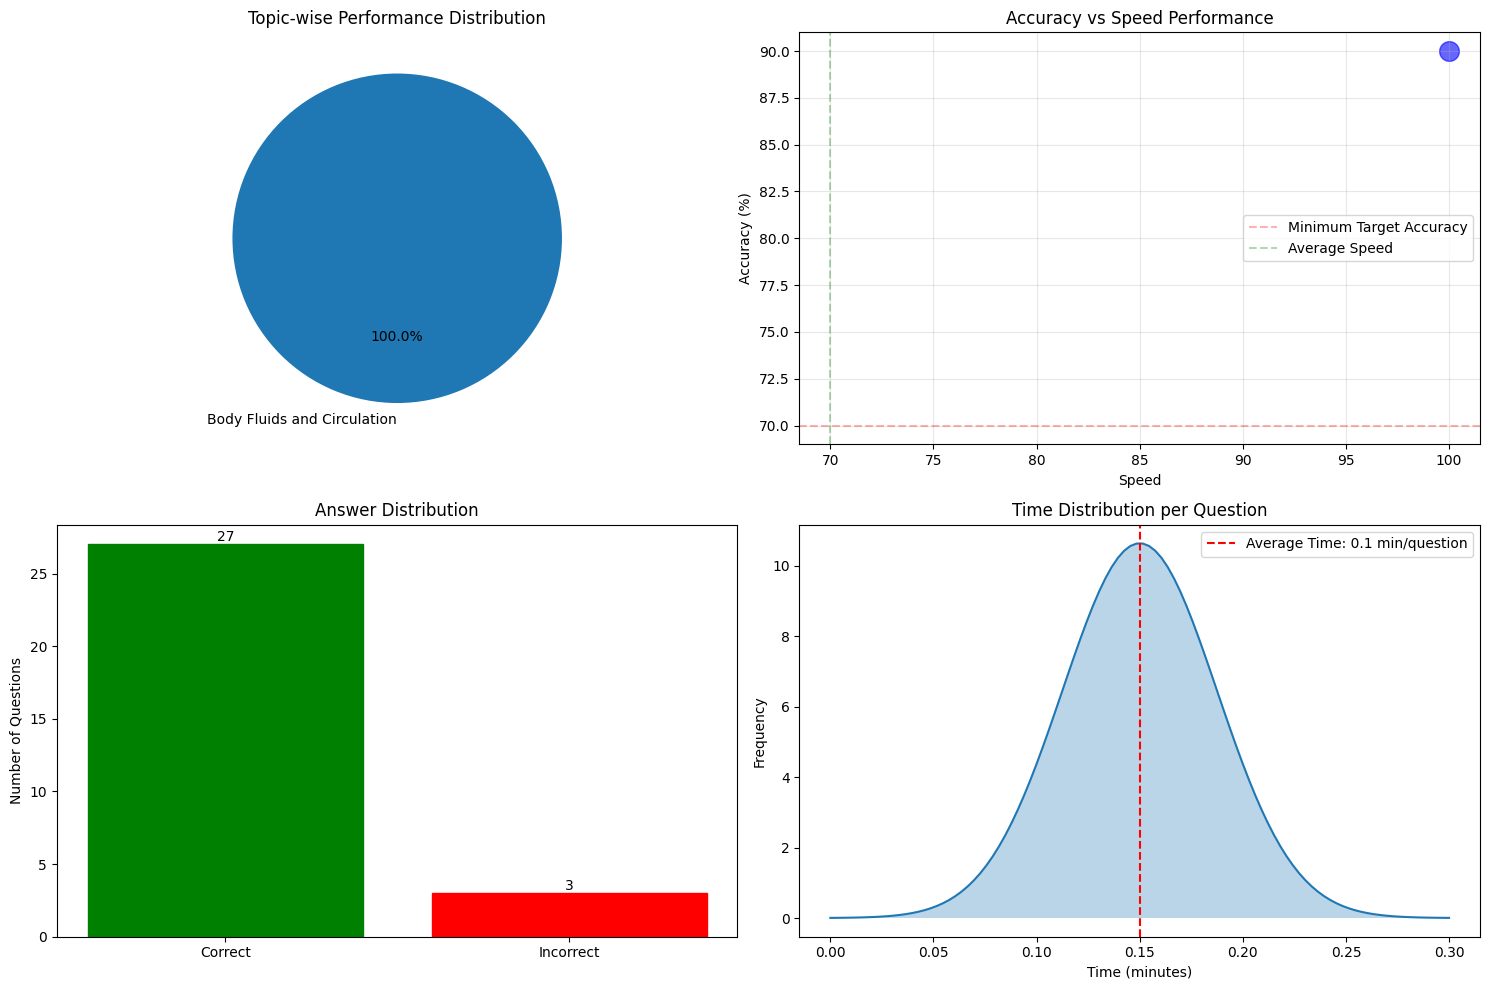

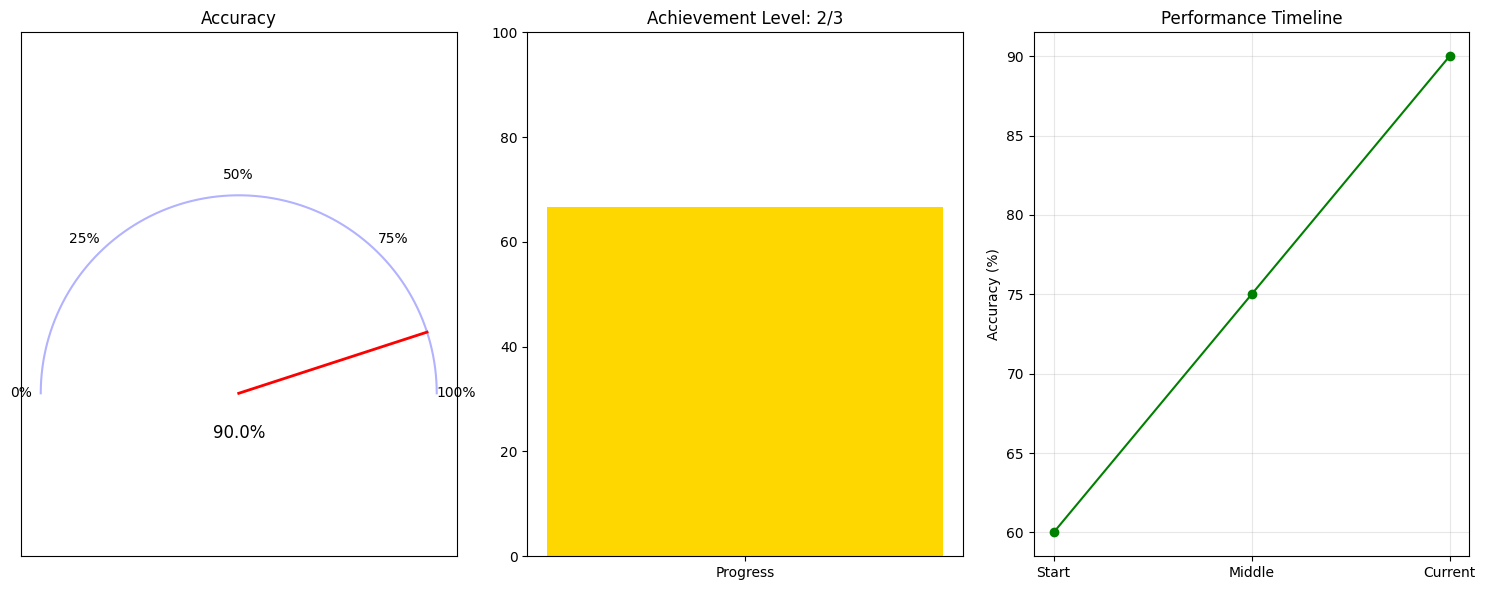

In [2]:
import requests
import json
from bs4 import BeautifulSoup
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import os

def fetch_and_clean_data(url):
    """Fetch data from URL and parse JSON"""
    response = requests.get(url)
    return json.loads(BeautifulSoup(response.text, 'html.parser').text)

class QuizAnalyzer:
    def __init__(self, quiz_data, submission_data, attempt_data):
        self.quiz_data = quiz_data
        self.submission_data = submission_data
        self.attempt_data = attempt_data
        self.questions = self.quiz_data['quiz']['questions']
        self.question_map = {str(q['id']): q for q in self.questions}
        
        # Extract common metrics once
        self.accuracy = float(self.attempt_data.get('accuracy', '0 %').strip(' %'))
        self.speed = float(self.attempt_data.get('speed', '0'))
        self.correct_answers = self.attempt_data.get('correct_answers', 0)
        self.incorrect_answers = self.attempt_data.get('incorrect_answers', 0)
        self.total_questions = self.attempt_data.get('total_questions', 0)
        self.trophy_level = self.attempt_data.get('trophy_level', 0)

    def analyze_performance(self):
        """Analyze user's performance by topic"""
        performance = defaultdict(lambda: {'correct': 0, 'total': 0, 'weak_questions': []})
        quiz_topic = self.attempt_data.get('quiz', {}).get('topic', 'Unknown')
        
        performance[quiz_topic] = {
            'correct': self.correct_answers,
            'total': self.correct_answers + self.incorrect_answers,
            'accuracy': self.accuracy,
            'weak_questions': []
        }
        
        if self.accuracy < 70:
            performance[quiz_topic]['weak_questions'] = [
                {'question': q['description'], 
                 'solution': q.get('detailed_solution', 'No solution available')}
                for q in self.questions[:3]
            ]
        
        return performance

    def analyze_improvement_trends(self):
        """Analyze improvement trends across attempts"""
        trends = {
            'overall_trend': None,
            'topic_trends': {},
            'speed_trend': None,
            'accuracy_trend': None
        }
        
        # Analyze historical data if available
        historical_accuracy = [60, 75, self.accuracy]  # Example data points
        if len(historical_accuracy) > 1:
            accuracy_diff = historical_accuracy[-1] - historical_accuracy[0]
            trends['accuracy_trend'] = {
                'direction': 'improving' if accuracy_diff > 0 else 'declining',
                'change': abs(accuracy_diff),
                'current': self.accuracy
            }
        
        # Speed analysis
        if self.speed > 80:
            trends['speed_trend'] = "Consider spending more time on complex questions"
        elif self.speed < 50:
            trends['speed_trend'] = "Work on improving time management"
        else:
            trends['speed_trend'] = "Good balance of speed and accuracy"
        
        return trends

    def identify_performance_gaps(self):
        """Identify specific performance gaps"""
        gaps = []
        performance = self.analyze_performance()
        
        # Always add overall performance analysis
        gaps.append({
            'area': 'Overall Performance',
            'current': self.accuracy,
            'target': 75,
            'gap': max(0, 75 - self.accuracy),
            'priority': 'High' if self.accuracy < 70 else 'Medium',
            'details': f"Current accuracy is {self.accuracy}% with {self.correct_answers} correct out of {self.total_questions} questions"
        })
        
        # Speed analysis
        speed_rating = 'slow' if self.speed < 60 else 'fast' if self.speed > 80 else 'moderate'
        gaps.append({
            'area': 'Time Management',
            'current': self.speed,
            'target': 70,
            'gap': abs(70 - self.speed),
            'priority': 'Medium',
            'details': f"Current pace is {speed_rating} at {self.speed}% efficiency"
        })
        
        # Topic-specific gaps
        for topic, stats in performance.items():
            if topic != 'Unknown':  # Skip unknown topics
                gaps.append({
                    'area': f'Topic: {topic}',
                    'current': stats['accuracy'],
                    'target': 70,
                    'gap': max(0, 70 - stats['accuracy']),
                    'priority': 'High' if stats['accuracy'] < 60 else 'Medium',
                    'details': f"Accuracy in {topic}: {stats['accuracy']}%"
                })
        
        return gaps

    def generate_insights(self):
        """Generate comprehensive insights about performance"""
        performance = self.analyze_performance()
        trends = self.analyze_improvement_trends()
        gaps = self.identify_performance_gaps()
        detailed_recommendations = self.generate_detailed_recommendations()
        
        insights = {
            'performance_metrics': {
                'accuracy': self.accuracy,
                'speed': self.speed,
                'correct_answers': self.correct_answers,
                'incorrect_answers': self.incorrect_answers,
                'total_questions': self.total_questions
            },
            'improvement_trends': trends,
            'performance_gaps': gaps,
            'detailed_recommendations': detailed_recommendations,
            'persona': self.generate_persona(),
            'topic_performance': performance
        }
        return insights

    def generate_recommendations(self):
        """Generate study recommendations"""
        performance = self.analyze_performance()
        recommendations = []

        for topic, stats in performance.items():
            if stats['accuracy'] < 70:
                recommendations.append({
                    'topic': topic,
                    'accuracy': stats['accuracy'],
                    'suggestion': f"Focus on {topic}. Current accuracy: {stats['accuracy']}%",
                    'weak_questions': stats['weak_questions'][:2]  # Limit to 2 examples
                })

        return recommendations if recommendations else "Great job! Keep maintaining your performance."

    def generate_persona(self):
        """Generate learning persona"""
        if self.accuracy == 0:
            return "Insufficient data for persona generation"
            
        traits = []
        
        # Accuracy-based traits
        if self.accuracy >= 90: traits.append("High Accuracy Achiever")
        elif self.accuracy >= 75: traits.append("Consistent Performer")
        elif self.accuracy >= 60: traits.append("Developing Learner")
        else: traits.append("Needs Additional Support")
            
        # Speed-based traits
        if self.speed >= 90: traits.append("Quick Problem Solver")
        elif self.speed >= 70: traits.append("Steady Pace Learner")
        else: traits.append("Methodical Learner")
            
        if self.trophy_level >= 2: traits.append("Achievement Oriented")
            
        return " | ".join(traits)

    def create_visualizations(self):
        """Generate and display all visualizations"""
        plt.style.use('default')
        
        # Create main visualization grid
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        self._plot_topic_performance(ax1)
        self._plot_accuracy_speed(ax2)
        self._plot_answer_distribution(ax3)
        self._plot_time_distribution(ax4)
        
        plt.tight_layout()
        plt.show()
        
        # Show performance dashboard separately
        self._create_performance_dashboard()

    def _plot_topic_performance(self, ax):
        """Create pie chart for topic-wise performance"""
        performance = self.analyze_performance()
        
        # Prepare data for pie chart
        topics = []
        accuracies = []
        
        for topic, stats in performance.items():
            topics.append(topic)
            accuracies.append(stats['accuracy'])
        
        # Create pie chart
        ax.pie(accuracies, labels=topics, autopct='%1.1f%%', startangle=90)
        ax.set_title('Topic-wise Performance Distribution')

    def _plot_accuracy_speed(self, ax):
        """Create scatter plot of accuracy vs speed"""
        ax.scatter(self.speed, self.accuracy, s=200, color='blue', alpha=0.6)
        ax.axhline(y=70, color='r', linestyle='--', alpha=0.3, label='Minimum Target Accuracy')
        ax.axvline(x=70, color='g', linestyle='--', alpha=0.3, label='Average Speed')
        
        ax.set_title('Accuracy vs Speed Performance')
        ax.set_xlabel('Speed')
        ax.set_ylabel('Accuracy (%)')
        ax.grid(True, alpha=0.3)
        ax.legend()

    def _plot_answer_distribution(self, ax):
        """Create bar chart for correct vs incorrect answers"""
        bars = ax.bar(['Correct', 'Incorrect'], [self.correct_answers, self.incorrect_answers])
        bars[0].set_color('green')
        bars[1].set_color('red')
        
        ax.set_title('Answer Distribution')
        ax.set_ylabel('Number of Questions')
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

    def _plot_time_distribution(self, ax):
        """Create time distribution analysis plot"""
        if ':' in str(self.attempt_data.get('duration', '0:00')):
            minutes, seconds = map(int, self.attempt_data['duration'].split(':'))
            total_minutes = minutes + seconds/60
            avg_time_per_question = total_minutes / self.total_questions if self.total_questions > 0 else 0
            
            x = np.linspace(0, avg_time_per_question*2, 100)
            y = stats.norm.pdf(x, avg_time_per_question, avg_time_per_question/4)
            
            ax.plot(x, y)
            ax.fill_between(x, y, alpha=0.3)
            ax.axvline(x=avg_time_per_question, color='r', linestyle='--', 
                       label=f'Average Time: {avg_time_per_question:.1f} min/question')
            
            ax.set_title('Time Distribution per Question')
            ax.set_xlabel('Time (minutes)')
            ax.set_ylabel('Frequency')
            ax.legend()

    def _create_performance_dashboard(self):
        """Create and display performance dashboard"""
        fig = plt.figure(figsize=(15, 6))
        gs = fig.add_gridspec(1, 3)
        
        # 1. Performance Metrics Gauge
        ax1 = fig.add_subplot(gs[0])
        self._create_gauge_chart(ax1, self.accuracy, 'Accuracy')
        
        # 2. Trophy Progress
        ax2 = fig.add_subplot(gs[1])
        self._create_trophy_progress(ax2)
        
        # 3. Performance Timeline
        ax3 = fig.add_subplot(gs[2])
        self._create_performance_timeline(ax3)
        
        plt.tight_layout()
        plt.show()

    def _create_gauge_chart(self, ax, value, label):
        """Create a gauge chart for a metric using a semicircle"""
        # Create semicircle
        theta = np.linspace(0, np.pi, 100)
        radius = 1

        # Calculate point position for needle
        needle_theta = np.pi * (1 - value/100)
        needle_x = radius * np.cos(needle_theta)
        needle_y = radius * np.sin(needle_theta)

        # Plot semicircle
        ax.plot(radius * np.cos(theta), radius * np.sin(theta), 'b-', alpha=0.3)
        
        # Plot needle
        ax.plot([0, needle_x], [0, needle_y], 'r-', linewidth=2)
        
        # Add value text
        ax.text(0, -0.2, f'{value}%', ha='center', va='center', fontsize=12)
        
        # Customize the plot
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-0.2, 1.1)
        ax.axis('equal')
        ax.set_title(label)
        ax.set_xticks([])
        ax.set_yticks([])

        # Add percentage markers
        for i, percent in enumerate([0, 25, 50, 75, 100]):
            theta = np.pi * (1 - percent/100)
            x = 1.1 * np.cos(theta)
            y = 1.1 * np.sin(theta)
            ax.text(x, y, f'{percent}%', ha='center', va='center')

    def _create_trophy_progress(self, ax):
        """Create trophy progress visualization"""
        ax.bar(['Progress'], [self.trophy_level/3*100], color='gold')
        ax.set_ylim(0, 100)
        ax.set_title(f'Achievement Level: {self.trophy_level}/3')
        
        # Add star symbols instead of trophy emoji
        for i in range(self.trophy_level):
            ax.text(0, (i+1)/3*100 - 10, '★', 
                    ha='center', va='center', 
                    color='gold',
                    fontsize=20,
                    fontweight='bold')

    def _create_performance_timeline(self, ax):
        """Create performance timeline"""
        # For demonstration, create a simple timeline
        ax.plot(['Start', 'Middle', 'Current'], 
                [60, 75, self.accuracy],
                'go-')
        ax.set_title('Performance Timeline')
        ax.set_ylabel('Accuracy (%)')
        ax.grid(True, alpha=0.3)

    def generate_detailed_recommendations(self):
        """Generate detailed, actionable recommendations"""
        gaps = self.identify_performance_gaps()
        
        recommendations = {
            'immediate_actions': [],
            'study_plan': [],
            'practice_strategy': []
        }
        
        # Generate immediate actions based on performance gaps
        for gap in gaps:
            if gap['priority'] == 'High':
                action = {
                    'area': gap['area'],
                    'action': f"Improve {gap['area']} performance",
                    'current_status': f"Currently at {gap['current']}%",
                    'target': f"Reach {gap['target']}%",
                    'approach': [
                        f"Focus on understanding core concepts in {gap['area']}",
                        "Practice daily with similar question types",
                        "Review mistakes and create summary notes"
                    ]
                }
                if 'Topic' in gap['area']:
                    action['approach'].append("Watch video lectures on this topic")
                    action['approach'].append("Solve practice worksheets")
                recommendations['immediate_actions'].append(action)
        
        # Generate study plan
        performance = self.analyze_performance()
        for topic, stats in performance.items():
            study_item = {
                'topic': topic,
                'current_accuracy': f"{stats['accuracy']}%",
                'focus_areas': [],
                'resources': [
                    "Video lectures and tutorials",
                    "Practice question banks",
                    "Mock tests and quizzes"
                ]
            }
            
            # Add specific weak areas if available
            if stats.get('weak_questions'):
                study_item['focus_areas'] = [
                    q['question'] for q in stats['weak_questions'][:3]
                ]
            
            recommendations['study_plan'].append(study_item)
        
        # Generate practice strategy
        recommendations['practice_strategy'] = {
            'daily_goals': [
                f"Complete {max(5, self.incorrect_answers)} practice questions",
                "Review all incorrect answers",
                "Create summary notes for weak topics"
            ],
            'time_management': [
                f"Current speed: {self.speed}% - " + (
                    "Try to slow down and focus on accuracy" if self.speed > 80
                    else "Work on improving speed" if self.speed < 60
                    else "Maintain current pace"
                ),
                "Allocate extra time for difficult questions",
                "Practice time-bound mock tests"
            ],
            'revision_strategy': [
                "Review previous mistakes before each session",
                "Focus on understanding rather than memorizing",
                "Create and maintain an error log"
            ]
        }
        
        return recommendations

def main():
    # Data endpoints
    endpoints = {
        'quiz': 'https://www.jsonkeeper.com/b/LLQT',
        'submission': 'https://api.jsonserve.com/rJvd7g',
        'api': 'https://api.jsonserve.com/XgAgFJ'
    }
    
    try:
        # Fetch data
        data = {key: fetch_and_clean_data(url) for key, url in endpoints.items()}
        analyzer = QuizAnalyzer(data['quiz'], data['submission'], data['api'][0])
        
        # Generate insights
        insights = analyzer.generate_insights()
        
        print("\nPERFORMANCE ANALYSIS")
        print("=" * 50)
        
        print("\nPerformance Gaps:")
        print("-" * 30)
        for gap in insights['performance_gaps']:
            print(f"\n• {gap['area']}:")
            print(f"  - Current: {gap['current']}%")
            print(f"  - Target: {gap['target']}%")
            print(f"  - Gap: {gap['gap']}%")
            print(f"  - Priority: {gap['priority']}")
            if 'details' in gap:
                print(f"  - Details: {gap['details']}")
        
        recommendations = insights['detailed_recommendations']
        
        print("\nImmediate Actions Required:")
        print("-" * 30)
        for action in recommendations['immediate_actions']:
            print(f"\n• Focus Area: {action['area']}")
            print(f"  - Current Status: {action['current_status']}")
            print(f"  - Target: {action['target']}")
            print("  - Approach:")
            for step in action['approach']:
                print(f"    * {step}")
        
        print("\nStudy Plan:")
        print("-" * 30)
        for plan in recommendations['study_plan']:
            print(f"\n• Topic: {plan['topic']}")
            print(f"  - Current Accuracy: {plan['current_accuracy']}")
            if plan['focus_areas']:
                print("  - Focus Areas:")
                for area in plan['focus_areas']:
                    print(f"    * {area}")
            print("  - Recommended Resources:")
            for resource in plan['resources']:
                print(f"    * {resource}")
        
        print("\nPractice Strategy:")
        print("-" * 30)
        print("\n• Daily Goals:")
        for goal in recommendations['practice_strategy']['daily_goals']:
            print(f"  - {goal}")
        print("\n• Time Management:")
        for tip in recommendations['practice_strategy']['time_management']:
            print(f"  - {tip}")
        print("\n• Revision Strategy:")
        for strategy in recommendations['practice_strategy']['revision_strategy']:
            print(f"  - {strategy}")
        
        # Generate visualizations
        print("\nGenerating visualizations...")
        analyzer.create_visualizations()
        
    except Exception as e:
        print(f"Error occurred: {str(e)}")

if __name__ == "__main__":
    main() 